# Animation of a river stage change

A river stage suddenly changes by 2 m and after 2 days it changes back to the original level.

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.special import erfc

In [32]:
kD = 900 # m2/d
S = 0.1
A = 1.0 # m
dt = 2.0  # time when stage returns to zero

x = np.linspace(0, 1000., 101)
times = np.linspace(0.,10.,121)
times[0] = 0.01

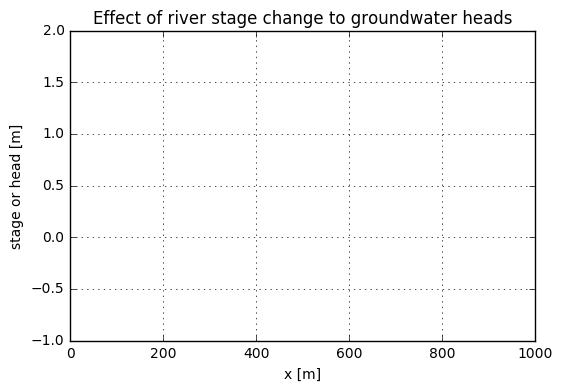

In [42]:
# first set up the figure, the axes and the plot element we want to animate
fig, ax = plt.subplots()

ax.set(xlabel='x [m]', ylabel='stage or head [m]', xlim=(0, x[-1]), ylim=(-0.5, 1.5))
ax.set_title('Effect of river stage change to groundwater heads')
ax.grid(True)
line, = ax.plot([],[], lw=2)

In [43]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [44]:
# animation function. This is called sequentially
def animate(i):
    t = times[i]
    u1 = np.sqrt(x**2 * S / (4 * kD * t))
    s = A * erfc(u1)
    if t>dt:
        u2 = np.sqrt(x**2 * S / (4 * kD * (t - dt)))
        s -= A * erfc(u2)
    line.set_data(x, s)
    return (line,)

In [45]:
# call the animator. blit=True means: only re-daw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(times), interval=20, blit=True)

To show the animation, anim uses its conversion of the video to html5 using its method to_html5_video(), and the result is shown through the HTML() function.

In [46]:
# Show the animation.
HTML(anim.to_html5_video())